In [1]:
import xarray as xr
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
times = pd.date_range('2000-01-01', '2001-12-31', name='time')
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))
ds = xr.Dataset({'tmin': (('time',), annual_cycle)},
                {'time': times})

In [3]:
ds

<xarray.Dataset>
Dimensions:  (time: 731)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2001-12-31
Data variables:
    tmin     (time) float64 -0.9854 -0.9882 -0.9906 ... -0.9743 -0.978 -0.9815

/Users/scollis/anaconda3/envs/healthmon/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


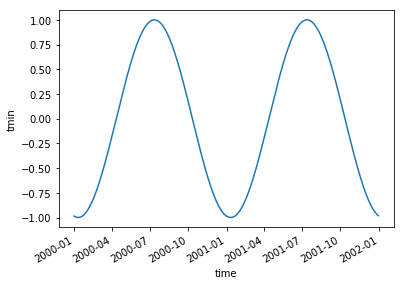

In [4]:
ds.tmin.plot()

In [5]:
class arm_xarray(xr.Dataset):
    def check_units_exist(self, var):
        has_units = hasattr(ds.tmin, 'units')
        return has_units
    
    def check_for_silly_units(self, var):
        if self.check_units_exist(var):
            is_silly = ds.tmin.units == 'Time since regge began'
        else:
            is_silly = False
        return is_silly
        
    

In [6]:
ds = arm_xarray({'tmin': (('time',), annual_cycle)},
                {'time': times})

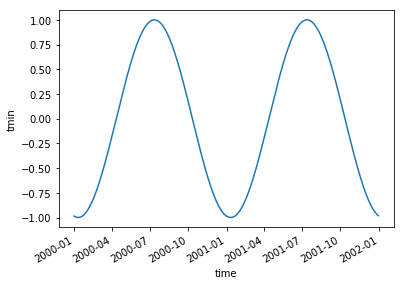

In [7]:
ds.tmin.plot()

In [8]:
ds.check_units_exist('tmin')

False

In [9]:
ds.check_for_silly_units('tmin')

False

In [10]:
ds.variables['tmin'].attrs['units'] = 'time since rock started'

In [11]:
ds.check_units_exist('tmin')

True

In [12]:
ds.check_for_silly_units('tmin')

False

In [13]:
ds.variables['tmin'].attrs['units'] = 'Time since regge began'

In [14]:
ds.check_units_exist('tmin')

True

In [15]:
ds.check_for_silly_units('tmin')

True